In [1]:
import re
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from library import (
    get_squad_as_index,
    remove_unnamed_cols,
    clean_opp_df,
    clean_main_df,
    merge_dfs,
    create_multiple_season_dfs,
    SetScraper,
    edit_gk_tables,
    edit_standard_stats_table,
)

### How many games does a team needs to win to be crowned champions?

First we will need to import the standing tables

In [12]:
# create_multiple_season_dfs(country="England", tier=1, year_range="2017-2023")

In [13]:
# d = get_single_season_league_data("England", 1, 2017)
# headers = {}
# for data, df in d.items():
#     headers[data] = df.columns

In [14]:
p_dir = "./frames/England/1/"
seasons = {
    "2017-2018": "standings_table.xlsx",
    "2018-2019": "standings_table.xlsx",
    "2019-2020": "standings_table.xlsx",
    "2020-2021": "standings_table.xlsx",
    "2021-2022": "standings_table.xlsx",
}
dfs = {}
for season, file in seasons.items():
    dfs[season] = pd.read_excel(f"{p_dir}{season}/{file}")
    dfs[season].drop(columns="Unnamed: 0", inplace=True)
    # dfs[season].set_index("Rk", inplace=True)
    # dfs[season] = dfs[season].T

In [15]:
for season, standings_table in dfs.items():
    seas_short = season[2:7]
    standings_table["Season"] = seas_short

five_yrs_standings = pd.concat(dfs.values(), ignore_index=True)

In [16]:
ucl = five_yrs_standings[five_yrs_standings.Rk <= 4]
ucl.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,M_G_Indv,Season
0,1,Manchester City,38,32,4,2,106,27,79,100,2.63,78.6,23.8,54.8,1.44,54070,21,17-20
1,2,Manchester Utd,38,25,6,7,68,28,40,81,2.13,55.7,40.7,15.0,0.40,74976,16,17-20
2,3,Tottenham,38,23,8,7,74,36,38,77,2.03,64.7,33.9,30.8,0.81,67953,30,17-20
3,4,Liverpool,38,21,12,5,84,38,46,75,1.97,72.9,33.8,39.1,1.03,53049,32,17-20
20,1,Manchester City,38,32,2,4,95,23,72,98,2.58,84.3,24.7,59.6,1.57,54130,21,18-20


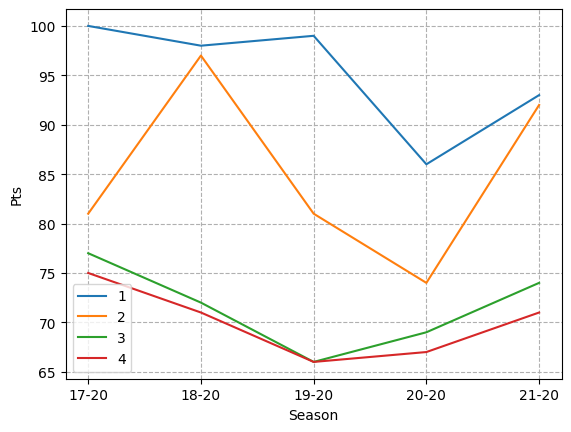

In [17]:
rankings = ucl.Rk.unique()
for ranking in rankings:
    ucl_r = ucl[ucl.Rk == ranking]
    plt.plot(ucl_r.Season, ucl_r.Pts, label=ranking)

plt.xlabel("Season")
plt.ylabel("Pts")
plt.grid(linestyle="dashed")
plt.legend()
plt.show()

In [24]:
def plot_line(df: pd.DataFrame, x_axis: dict[str, str], y_axis: dict[str, str], col: dict[str, str]):
    """ 
    df: the Dataframe
    x_axis: {"col_name": "df.col", "xaxis_title": "str"}
    y_axis: {"col_name": "df.col",  "yaxis_tile": "str"}
    col: {"col_name": "df.col",  "legend_title": "str"}
    """

    fig = px.line(
        dfs,
        x=x_axis["col_name"]
        y=y_axis["col_name"]
        color=col["col_name"]
        hover_name="Squad",
    )
    fig.update_layout(
        xaxis_title=x_axis["xaxis_title"]
        yaxis_title=y_axis["yaxis_title"]
        legend_title=col["legend_title"]
        template="plotly_dark",
    )
    fig.show()

In [ ]:
def plot_line(df: pd.DataFrame, x_axis: dict[str, str], y_axis: dict[str, str], col: dict[str, str], template: str):
    """ 
    df: the Dataframe
    x_axis: {"col_name": "df.col", "xaxis_title": "str"}
    y_axis: {"col_name": "df.col",  "yaxis_tile": "str"}
    col: {"col_name": "df.col",  "legend_title": "str"}
    template: choose str from ["ggplot2", "seaborn", "simple_white", "plotly",
         "plotly_white", "plotly_dark", "presentation", "xgridoff",
         "ygridoff", "gridon", "none"]
    """

    fig = px.line(
        dfs,
        x=x_axis["col_name"]
        y=y_axis["col_name"]
        color=col["col_name"]
        hover_name="Squad",
    )
    fig.update_layout(
        xaxis_title=x_axis["xaxis_title"]
        yaxis_title=y_axis["yaxis_title"]
        legend_title=col["legend_title"]
        template=template
    )
    fig.show()